In [1]:
import numpy as np
print('Numpy version:', np.__version__)

import matplotlib as mpl
print('Matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt


import sys
import logging

Numpy version: 1.23.5
Matplotlib version: 3.6.2


In [2]:
logger = logging.getLogger('hw1')
logger.setLevel(logging.DEBUG)
fmt_str = '%(asctime)s - %(name)s - %(funcName)s - %(levelname)s: %(message)s'
formatter = logging.Formatter(fmt=fmt_str, datefmt='%d-%b-%y %H:%M:%S')
handler = logging.StreamHandler(stream=sys.stdout)
handler.setFormatter(formatter)
logger.addHandler(handler)

In [3]:
logger.debug('Test message')

19-Feb-23 14:24:51 - hw1 - <module> - DEBUG: Test message


In [4]:
X = np.array(
    [[-1.0, -1.0],
    [1.0, 0.0],
    [-1.0, 1.5]]
)
y = np.array([1.0, -1.0, 1.0])
theta = np.array([0.0, 0.0])

In [5]:
X

array([[-1. , -1. ],
       [ 1. ,  0. ],
       [-1. ,  1.5]])

In [6]:
X_2 = np.array([X[1], X[0], X[2]])
y_2 = np.array([y[1], y[0], y[2]])
print(X_2)
print(y_2)

[[ 1.   0. ]
 [-1.  -1. ]
 [-1.   1.5]]
[-1.  1.  1.]


In [7]:
X[0].dot(theta)

0.0

In [8]:
X_3 = np.array(
    [[-1.0, -1.0],
    [1.0, 0.0],
    [-1.0, 10]]
)
y_3 = y

In [9]:
X_4 = np.array([X_3[1], X_3[0], X_3[2]])
y_4 = np.array([y_3[1], y_3[0], y_3[2]])
print(X_4)
print(y_4)

[[ 1.  0.]
 [-1. -1.]
 [-1. 10.]]
[-1.  1.  1.]


In [10]:
def perceptron_update(x_i, y_i, theta):
    if y_i * x_i.dot(theta) <= 0:
        return theta + y_i * x_i
    return theta

In [11]:
def perceptron_epoch(X, y, theta):
    for i in range(X.shape[0]): # number of rows (observations)
        logger.debug(f'Iteration {i}: {theta} => ...')
        theta = perceptron_update(X[i], y[i], theta)
        logger.debug(f'Iteration {i}:     ... => {theta}')
    return theta

In [12]:
theta = np.array([0.0, 0.0])
for epoch in range(10):
    logger.debug(f'Epoch {epoch}')
    theta = perceptron_epoch(X_4, y_4, theta)
print(theta)

19-Feb-23 14:24:52 - hw1 - <module> - DEBUG: Epoch 0
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 0: [0. 0.] => ...
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 0:     ... => [-1.  0.]
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 1: [-1.  0.] => ...
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 1:     ... => [-1.  0.]
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 2: [-1.  0.] => ...
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 2:     ... => [-1.  0.]
19-Feb-23 14:24:52 - hw1 - <module> - DEBUG: Epoch 1
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 0: [-1.  0.] => ...
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 0:     ... => [-1.  0.]
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 1: [-1.  0.] => ...
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - DEBUG: Iteration 1:     ... => [-1.  0.]
19-Feb-23 14:24:52 - hw1 - perceptron_epoch - 

In [13]:
perceptron_update(X[0], y[0], np.array([0.0, 0.0]))

array([-1., -1.])

In [14]:
theta

array([-1.,  0.])

pointNo coord       y    times_misclassified
1	    [-4, 2]     +1	    1
2	    [-2, 1]	    +1	    0 (always correctly classified)
3	    [-1, -1]	-1	    2
4	    [2, 2]	    -1	    1
5	    [1, -2]	    -1	    0 (always correctly classified)

In [15]:
X_5 = np.array([
    [-4, 2],
    [-2, 1],
    [-1, -1],
    [2, 2],
    [1, -2]
], dtype=float)
y_5 = np.array([1, 1, -1, -1, -1], dtype=float)
misclass = np.array([1, 0, 2, 1, 0])
print(X_5)
print(y_5)
print(misclass)

[[-4.  2.]
 [-2.  1.]
 [-1. -1.]
 [ 2.  2.]
 [ 1. -2.]]
[ 1.  1. -1. -1. -1.]
[1 0 2 1 0]


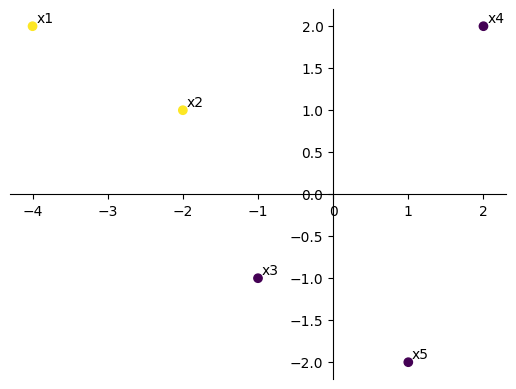

In [16]:
plt.scatter(X_5[:, 0], X_5[:, 1], c=y_5)
for i in range(X_5.shape[0]):
    plt.annotate('x'+str(i+1), xy=X_5[i]+0.05)
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [17]:
theta_changes_made = X_5 * y_5.reshape(-1, 1) * misclass.reshape(-1, 1)
theta_changes_made

array([[-4.,  2.],
       [-0.,  0.],
       [ 2.,  2.],
       [-2., -2.],
       [-0.,  0.]])

In [18]:
theta0_changes_made = y_5.dot(misclass)
theta0_changes_made

-2.0

In [19]:
X_6 = np.array([
    [-1, 1],
    [1, -1],
    [1, 1],
    [2, 2]
])
y_6 = np.array([1, 1, -1, -1])

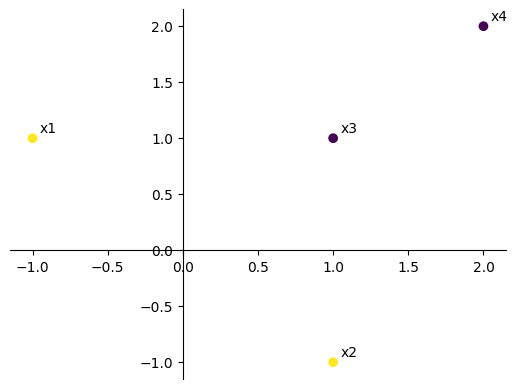

In [20]:
plt.scatter(X_6[:, 0], X_6[:, 1], c=y_6)
for i in range(X_6.shape[0]):
    plt.annotate('x'+str(i+1), xy=X_6[i]+0.05)
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [21]:
def get_circle_y(x, r, a, b):
    cond = (r**2 - (x+a)**2) >= 0
    if cond:
        return np.sqrt(r**2 - (x+a)**2)-b
    else:
        return np.nan

In [22]:
circle_x = np.arange(-2, 2.1, 0.5)
circle_x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

In [23]:
np.concatenate([circle_x, circle_x])

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. , -2. , -1.5,
       -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

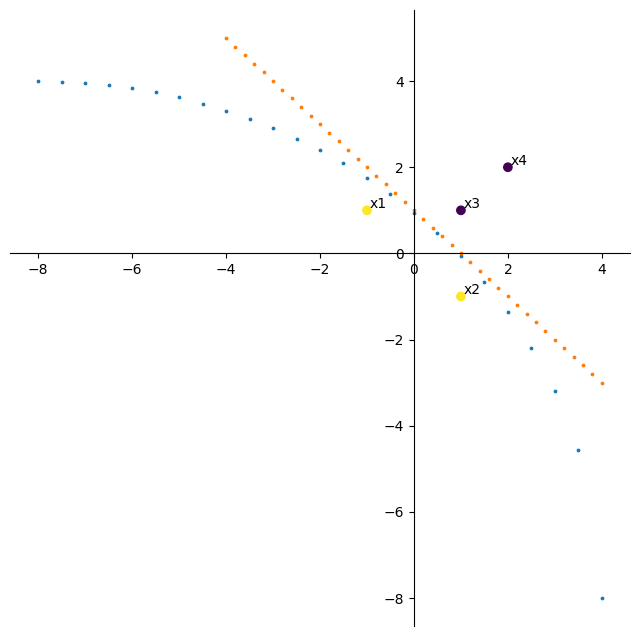

In [24]:
r = 12
a = 8
b = 8
circle_x = np.arange(-8, 8.1, 0.5)
circle_y = np.array([get_circle_y(x, r, a, b) for x in circle_x])
#circle_x = np.concatenate([circle_x, circle_x])
#circle_y = np.concatenate([circle_y, -circle_y])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_6[:, 0], X_6[:, 1], c=y_6)
for i in range(X_6.shape[0]):
    ax.annotate('x'+str(i+1), xy=X_6[i]+0.05)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xbound(lower=-10, upper=10)
ax.set_ybound(lower=-10, upper=10)
ax.scatter(circle_x, circle_y, s=3)
ax.scatter(np.arange(-4, 4.1, 0.2), -np.arange(-4, 4.1, 0.2)+1, s=3)

In [25]:
d = 2
f_x = lambda x: np.cos(np.pi * x)
X = np.zeros(shape=(d, d))
X

array([[0., 0.],
       [0., 0.]])

In [26]:
for i in range(d):
    for j in range(d):
        if i == j:
            X[i, j] = f_x(i+1)
X

array([[-1.,  0.],
       [ 0.,  1.]])

In [27]:
y = np.array([1.0, 1.0])

In [28]:
theta = np.array([0.0, 0.0])
for epoch in range(10):
    logger.debug(f'Epoch {epoch}')
    theta = perceptron_epoch(X, y, theta)
print(theta)

19-Feb-23 14:30:55 - hw1 - <module> - DEBUG: Epoch 0
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 0: [0. 0.] => ...
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 0:     ... => [-1.  0.]
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 1: [-1.  0.] => ...
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 1:     ... => [-1.  1.]
19-Feb-23 14:30:55 - hw1 - <module> - DEBUG: Epoch 1
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 0: [-1.  1.] => ...
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 0:     ... => [-1.  1.]
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 1: [-1.  1.] => ...
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 1:     ... => [-1.  1.]
19-Feb-23 14:30:55 - hw1 - <module> - DEBUG: Epoch 2
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 0: [-1.  1.] => ...
19-Feb-23 14:30:55 - hw1 - perceptron_epoch - DEBUG: Iteration 0:     ... => [-1